In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
#Número
np.random.rand()
#Lista
np.random.rand(10)
#Matriz
a = np.random.rand(1000,2)
print(a)

[[0.39475321 0.09197181]
 [0.96580559 0.11525268]
 [0.81087427 0.65969032]
 ...
 [0.66777987 0.3169137 ]
 [0.75560645 0.3563743 ]
 [0.33299131 0.94483715]]


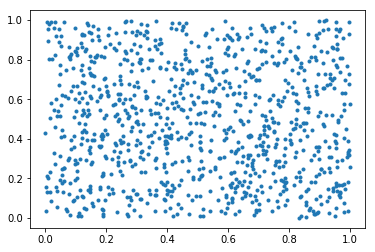

In [107]:
#Análisis de dispersión de números aleatorios
ax = plt.figure()
ax = plt.axes()
ax.plot(a[0:,0],a[0:,1],'.')


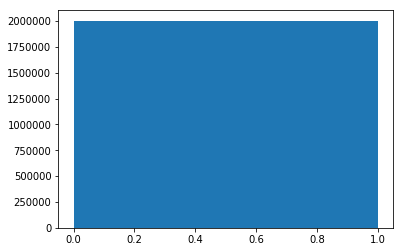

In [108]:
a= np.random.rand(100000000)
plt.hist(a,bins=50)
plt.show()

Se observa que la frecuencia de aparición de los números entre 0 y 1 es prácticamente la misma

In [109]:
#Se pueden generar números con distribuciones normales
x = []
y = []

for i in range(0,1000):
    if (i%2 == 0):
        x.append(np.random.normal())
    else:
        y.append(np.random.normal())

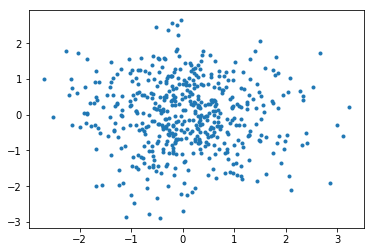

In [110]:
#Análisis de dispersión de números aleatorios
ax = plt.figure()
ax = plt.axes()
ax.plot(x,y,'.')
#Aplicaciones a Galaxias

In [111]:
t = np.random.normal(size = (100000))

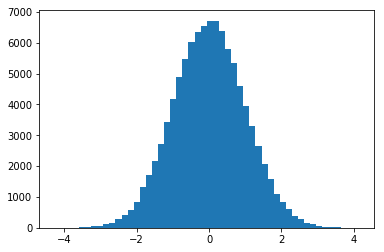

In [112]:
plt.hist(t,bins=50)
plt.show()

In [126]:
#Monte Carlo Integración
datos = np.random.rand(1000,2)

(0, 1)

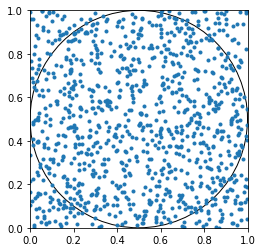

In [127]:
#Análisis de dispersión de números aleatorios
ax = plt.figure()
ax = plt.axes()
ax.plot(datos[0:,0],datos[0:,1],'.')
circle = plt.Circle((0.5,0.5),0.5,fill = False)
ax.add_artist(circle)
ax.set_aspect('equal')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

In [128]:
N_in = 0
N = datos.shape[0]

for i in range(0,int(datos.shape[0])):
    
    d  = ((datos[i][0]-0.5)**2-(datos[i][1]-0.5)**2)**0.5
    if d <= 0.5:
        N_in += 1
        
print(N_in)

494


/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [129]:
pi = 4*(N_in/N)
print("pi = %f"%pi)

pi = 1.976000
